## First Test CME Exit Angle Calculations

Import astropy, numpy, and matplotlib libraries and open a few test images

6.549797e-08
8.946008e-08


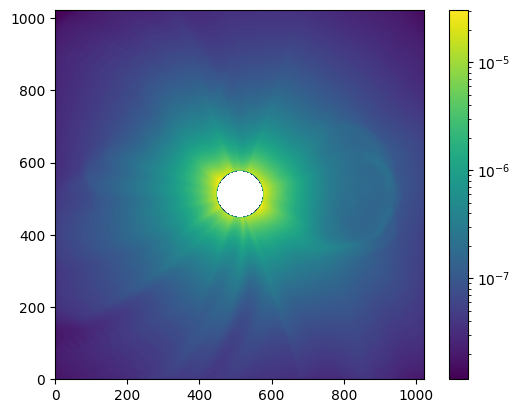

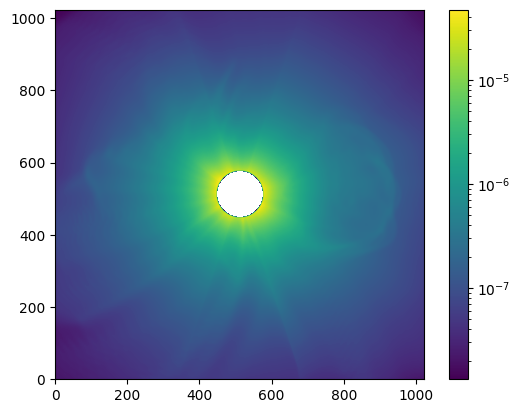

In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm


fits_file_pB = fits.open('CME_0_pB\stepnum_078.fits')
fits_file_tB = fits.open('CME_0_tB\stepnum_078.fits')
fits_file_pB2 = fits.open('CME_0_pB\stepnum_020.fits')
fits_file_tB2 = fits.open('CME_0_tB\stepnum_020.fits')

image_data_pB = fits_file_pB[0].data
image_data_tB = fits_file_tB[0].data
image_data_pB2 = fits_file_pB2[0].data
image_data_tB2 = fits_file_tB2[0].data

# print(image_data_pB)
# print(image_data_tB)
print(image_data_pB[900][600])
print(image_data_tB[900][600])

plt.figure()
plt.imshow(image_data_pB, origin='lower', norm=LogNorm())
plt.colorbar()
# plt.show()
plt.figure()
plt.imshow(image_data_tB, origin='lower', norm=LogNorm())
plt.colorbar()

This is the function that will calculate exit angle for each pixel, given pB an tB data. 

Inputs are pB image, tB image, and the bounds for x and y for the calculations.

Outputs are a matrix of exit angles for positive sqrt and negative sqrt.

$$\xi = \epsilon + \arcsin\left(\pm \sqrt{\left(\frac{1 - pB/B}{1+pB/B}\right)}\right)$$

In [8]:
def calculateExitAngles(image_data_pB, image_data_tB, xConstraints, yConstraints ):
    xMin, xMax = xConstraints
    yMin, yMax = yConstraints
    angleMatrixPositive = np.zeros((len(image_data_pB),len(image_data_pB[0]) ))
    angleMatrixNegative = np.zeros((len(image_data_pB),len(image_data_pB[0]) ))

    # angleMatrixPositive = [[0] * len(image_data_pB[0])  for i in range(len(image_data_pB))]
    # angleMatrixNegative = [[0] * len(image_data_pB[0])  for i in range(len(image_data_pB))]

    Y = len(image_data_pB)
    halfY = Y/2.0
    X = len(image_data_pB[0])
    halfX = X/2.0
    # print(angleMatrixPositive[0][0])
    for i in range(yMin,yMax):
        for j in range(xMin,xMax):
            y = np.abs(halfY - i)
            y = y*45/halfY

            x = np.abs(halfX- j)
            x = x*45/halfX
            
            epsilon = np.sqrt(x*x + y*y)
            # print(epsilon)
            if(image_data_tB[i][j] != 0):
                pBratio = image_data_pB[i][j]/image_data_tB[i][j]
                angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
                angleMatrixNegative[i][j] = epsilon + np.rad2deg(np.arcsin(-np.sqrt((1 - pBratio)/(1 + pBratio))))

    print("positive: ", angleMatrixPositive[500][750])
    print("negative: ", angleMatrixNegative[500][750])
    return angleMatrixPositive, angleMatrixNegative



Setup the calculations for the two sample images:

In [9]:
xMin = 0
xMax = 1024

yMin = 0
yMax = 1024


posMat, negMat = calculateExitAngles(image_data_pB, image_data_tB, (xMin,xMax), (yMin,yMax))
posMat2, negMat2 = calculateExitAngles(image_data_pB2, image_data_tB2,(xMin,xMax), (yMin,yMax))

positive:  49.4620492479615
negative:  -7.572967980947169
positive:  46.88142064083535
negative:  -4.992339373821018


Plot the output:

positive:  58.123784937491976
negative:  11.811531507978724


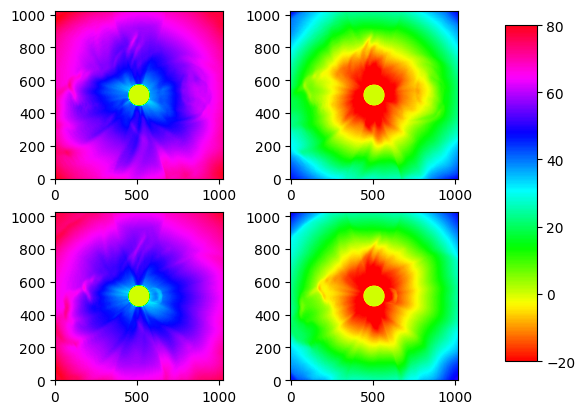

In [10]:



print("positive: ", posMat[900][600])
print("negative: ", negMat[900][600])

vmin = -20
vmax = 80
# plt.figure()
# plt.imshow(image_data_pB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.imshow(image_data_tB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()


fig, axs = plt.subplots(2,2)

axs[0,0].imshow(posMat[yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
axs[0,1].imshow(negMat[yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
axs[1,0].imshow(posMat2[yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
im = axs[1,1].imshow(negMat2[yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


plt.show()

# plt.figure
# plt.imshow(negMat[yMin:yMax,xMin:xMax], origin = 'lower')
# plt.colorbar()
# plt.show()
# plt.figure
# plt.imshow(posMat2[yMin:yMax,xMin:xMax], origin = 'lower')
# plt.colorbar()
# plt.show()
# plt.figure
# plt.imshow(negMat2[yMin:yMax,xMin:xMax], origin = 'lower')
# plt.colorbar()
# plt.show()





Setup a series of images starting at time step 10 and taking every 10th image and calculate the exit angles for each image.

In [11]:
xMin = 500
xMax = 800

yMin = 350
yMax = 650

pBdata = []
tBdata =[]

for i in range(10,79,10):
  fits_file_pB = fits.open(f'CME_0_pB\stepnum_0{i}.fits')
  fits_file_tB = fits.open(f'CME_0_tB\stepnum_0{i}.fits')


  pBdata.append(fits_file_pB[0].data)
  tBdata.append(fits_file_tB[0].data)

posMats = []
negMats = []

for i in range(len(pBdata)):
    posMat, negMat = calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax))
    posMats.append(posMat)
    negMats.append(negMat)



positive:  46.69580258398835
negative:  -4.80672131697402
positive:  46.88142064083535
negative:  -4.992339373821018
positive:  47.21446716465645
negative:  -5.325385897642114
positive:  45.64574366249687
negative:  -3.7566623954825396
positive:  51.82015553925565
negative:  -9.931074272241315
positive:  52.4663592423494
negative:  -10.577277975335068
positive:  51.05602169407555
negative:  -9.166940427061213


Plot the images side by side, left is positive sqrt and right is negative sqrt

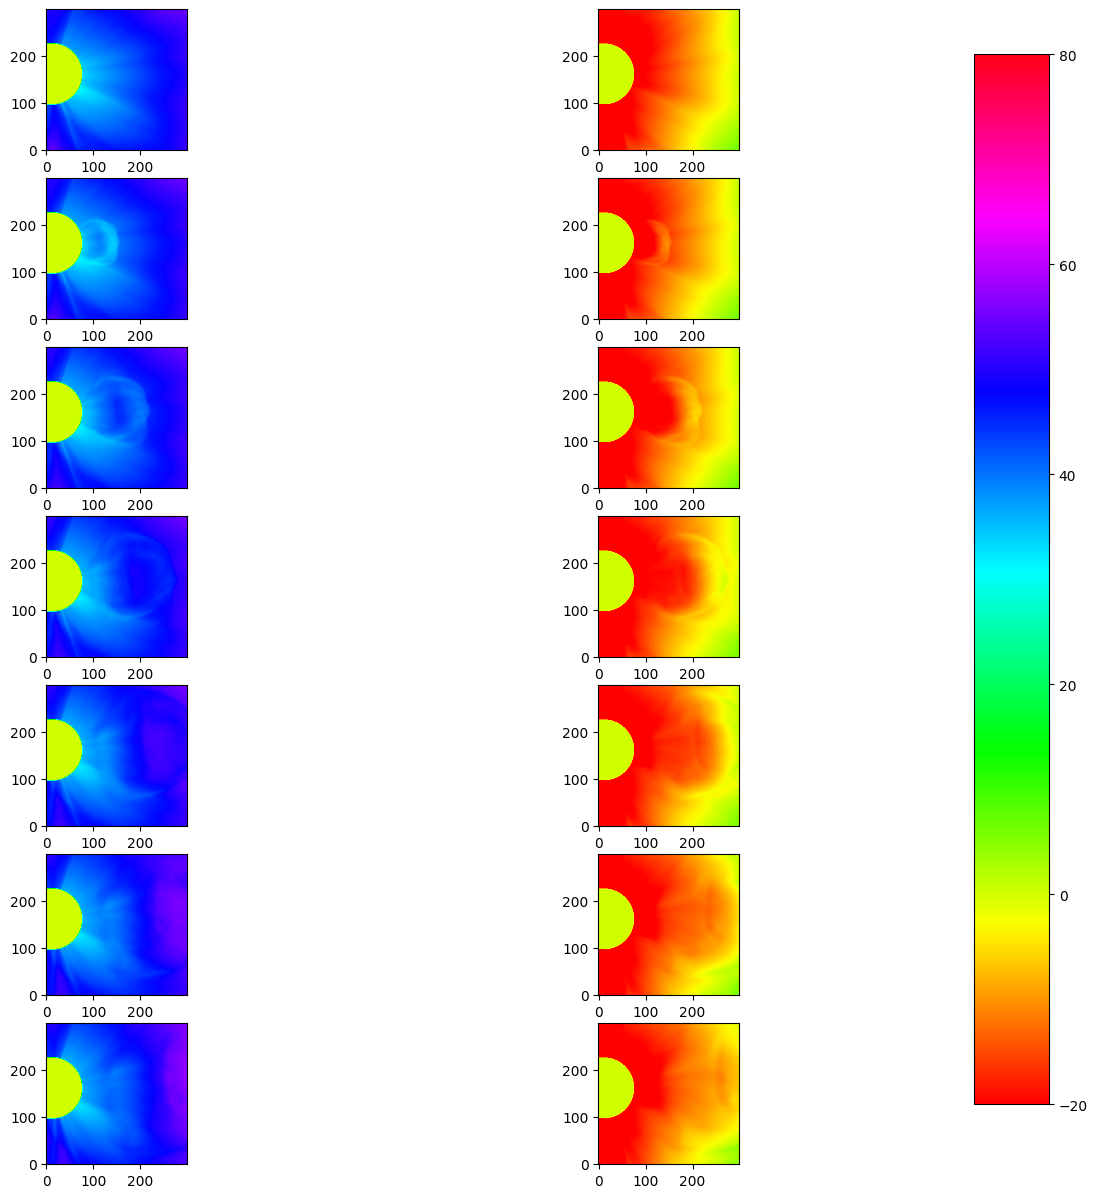

In [12]:


vmin = -20
vmax = 80

# plt.figure()
# plt.imshow(image_data_pB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.imshow(image_data_tB, origin = 'lower', norm = LogNorm())
# plt.colorbar()
# plt.show()


fig, axs = plt.subplots(len(pBdata),2,figsize=(15, 15))

for i in range(len(pBdata)): 
    axs[i,0].imshow(posMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
    im = axs[i,1].imshow(negMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
    



# Show the plot

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)



plt.show()